### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression


In [2]:
def zscore_normalisation_2(x):
  #your code here
    dataset=np.array(x)
    std = np.std(dataset)
    mean=np.mean(x)
    z_scr=(dataset-mean)/std
    return z_scr

### Generating dataset

100

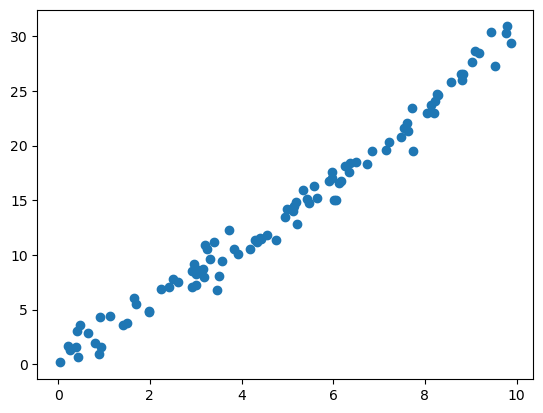

In [3]:
rng = np.random.RandomState(10)
x =np.array( 10 * rng.rand(100))
y = 0.1* x**2 + 2*x +1+ rng.randn(100)
plt.scatter(x, y)
m=x.shape[0]
m


### cubic_loss

In [4]:
def cubic_loss(x_hat, x):
    cost=(np.abs(x_hat - x) ** 3)
    return np.mean(cost)

### septic_loss

In [17]:
def septic_loss(x_hat, x):
    cost=(np.abs(x_hat - x) ** 7)
    return np.mean(cost)

### Hypothesis_linear

In [6]:
def hypothesis_lin(x,w,b):
    return w*x+b

### Hypothesis_polynomial

In [7]:
def hypothesis_pol(x,w_2,w_1,b):
    return w_2*x**2+w_1*x+b

### Gradient Decent_linear

In [8]:
def gradient_descent_lin(x,y,w,b,learning_rate,n):
    y_hat=hypothesis_lin(x,w,b)
    
    dw = (3/n) * np.sum(x*np.sign(y_hat - y)*(y_hat - y) ** 2)
    db = (3/n) * np.sum((y_hat - y)**2*np.sign(y_hat - y))
    w = w -learning_rate * dw
    b = b - learning_rate * db
    return w,b

### Gradient Decent_pol

In [32]:
def gradient_descent_pol(x,y,w_1,w_2,b,learning_rate,n):
    y_hat=hypothesis_pol(x,w_2,w_1,b)
    scaling_factor = np.max(np.abs(y_hat - y))
    dw_1 = (7/n) * np.sum(x * ((y_hat - y) / scaling_factor) ** 6*np.sign(y_hat - y) )
    dw_2 = (7/n)* np.sum(((y_hat - y) / scaling_factor) ** 6 *  x* np.sign(y_hat - y))
    db = (7/n )* np.sum(((y_hat - y) / scaling_factor) ** 6 * np.sign(y_hat - y))
    
    w_1 = w_1 -learning_rate * dw_1
    w_2 = w_2 -learning_rate * dw_2
    b = b - learning_rate * db
    return w_1,w_2,b

### Implementation

In [10]:
# Random Initialisation
w = np.random.randn(1)
b = np.random.randn(1)

# Hyperparameters
learning_rate = 0.000005
num_epochs = 100000


for i in range(num_epochs):
    w, b = gradient_descent_lin(x,y,w,b,learning_rate,m)
    y_hat = hypothesis_lin(x,w,b)
   

Obtained value of w: [2.87534231]
Obtained value of b: [0.11413195]
Obtained line: y=[2.87534231]x+[0.11413195]


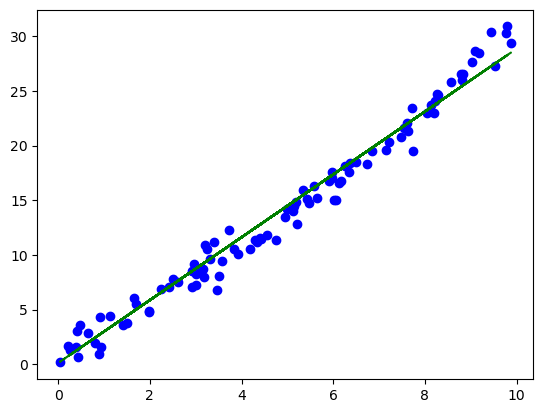

In [11]:
print(f"Obtained value of w: {w}")
print(f"Obtained value of b: {b}")
print(f"Obtained line: y={w}x+{b}")
plt.plot(x,y,'bo')
plt.plot(x,y_hat,'g--')
plt.show()

In [33]:
# Random Initialisation
x_new = zscore_normalisation_2(x)
x_new

array([ 1.03998617, -1.68958688,  0.53931661,  0.95810007,  0.04785215,
       -0.947543  , -1.04476502,  1.00074671, -1.15005409, -1.4437919 ,
        0.72737474,  1.70212508, -1.75069638,  0.09762094,  1.19018193,
        0.46250219,  0.85973327, -0.70359706,  1.57258961,  0.83362366,
        0.20800162, -1.24802893, -0.4073366 ,  0.68654871, -0.15825208,
       -0.18668788,  0.48156167,  0.10106115,  0.60022706,  0.42072731,
        1.16327867,  0.13200528,  1.53940409, -0.60409761, -1.43608384,
       -0.6715071 , -1.35053106,  1.24858822, -1.59450835,  0.51254674,
        0.22633696,  1.21442411, -1.04154775,  1.35102958, -0.48620921,
        0.97935209, -0.68873893,  1.44953316, -0.58127549, -1.16494604,
       -0.33755436, -1.4251701 ,  1.22103799, -1.21536444, -0.36815622,
        1.66891268,  1.82661615, -0.10562442,  1.23928386, -0.85088936,
        0.40739052,  1.51824912,  0.17895762,  0.38131454, -1.62219998,
       -0.46610161, -1.47552814, -0.65419704, -0.56233688,  1.04

In [ ]:
w_1 = 1.7
w_2 = 0.08
b = 0.8

# Hyperparameters
learning_rate_pol =0.0001
num_epochs_pol = 100000


for i in range(num_epochs_pol):
    w_1,w_2, b = gradient_descent_pol(x_new, y,w_1,w_2,b,learning_rate,m)
    print(w_1,w_2,b)

# Plot the scaled data
plt.scatter(x_new, y)
plt.xlabel('Scaled x')
plt.ylabel('Scaled y')
plt.title('Scaled Data')
plt.show()
   

In [13]:
x_reshaped = x.reshape(-1, 1)
model_sklearn = LinearRegression()
model_sklearn.fit(x_reshaped, y)

LinearRegression()

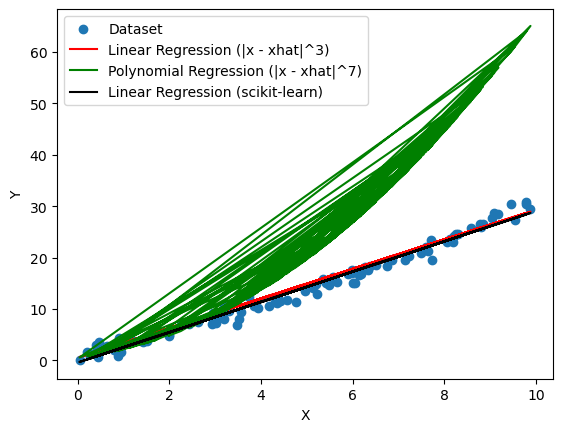

In [39]:
plt.scatter(x, y, label='Dataset')
plt.plot(x, hypothesis_lin(x,w,b), label='Linear Regression (|x - xhat|^3)', color='red')
plt.plot(x, hypothesis_pol(x,w_2,w_1,b), label='Polynomial Regression (|x - xhat|^7)', color='green')
plt.plot(x, model_sklearn.predict(x_reshaped), label='Linear Regression (scikit-learn)', color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [19]:
"""plt.figure(figsize=(10, 6))

# Hyperparameters
learning_rates = [0.000003,0.0000075,0.000001,0.000002]
num_epochs = 100000

for lr in learning_rates:
    # Random Initialization
    w = 5
    b = 8
    
    L=[]
    for i in range(num_epochs):
        w, b = gradient_descent_lin(x,y,w,b,lr,m)
        y_hat = hypothesis_lin(x,w,b)
        L.append(cubic_loss(y_hat,y))
    # Plot cost versus iteration
    plt.plot(range(num_epochs), L, label=f'LR={lr}')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost versus Iteration for Different Learning Rates')
plt.legend()
plt.show()"""

"plt.figure(figsize=(10, 6))\n\n# Hyperparameters\nlearning_rates = [0.000003,0.0000075,0.000001,0.000002]\nnum_epochs = 100000\n\nfor lr in learning_rates:\n    # Random Initialization\n    w = 5\n    b = 8\n    \n    L=[]\n    for i in range(num_epochs):\n        w, b = gradient_descent_lin(x,y,w,b,lr,m)\n        y_hat = hypothesis_lin(x,w,b)\n        L.append(cubic_loss(y_hat,y))\n    # Plot cost versus iteration\n    plt.plot(range(num_epochs), L, label=f'LR={lr}')\n\nplt.xlabel('Iteration')\nplt.ylabel('Cost')\nplt.title('Cost versus Iteration for Different Learning Rates')\nplt.legend()\nplt.show()"